# M10-L1 Problem 1

In this problem you will look compare models with lower/higher variance/bias by computing bias and variance at a single point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

def plot_model(model,color="blue"):
    x = np.linspace(0, np.pi*2, 100)
    y = model.predict(x.reshape(-1,1))
    plt.plot(x, y, color=color)
    plt.xlabel("x")
    plt.ylabel("y")

def plot_data(x, y):
    plt.scatter(x,y,color="black")

def eval_model_at_point(model, x):
    return model.predict(np.array([[x]])).item()

def train_models():
    x = np.random.uniform(0,np.pi*2,20).reshape(-1,1)
    y = np.random.normal(np.sin(x),0.5).flatten()

    modelA = LinearRegression()
    modelB = KNeighborsRegressor(3)
    modelA.fit(x,y)
    modelB.fit(x,y)
    return modelA, modelB, x, y



The function `train_models` gets 20 new data points and trains two models on these data points. Model A is a linear regression model, while model B is a 3-nearest neighbor regressor.

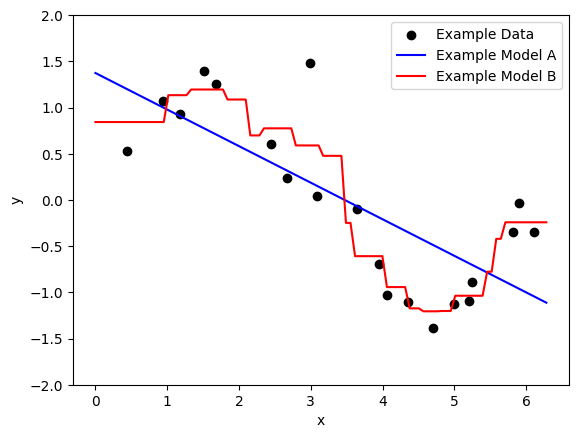

In [2]:
modelA, modelB, x, y = train_models()
plt.figure()
plot_data(x,y)
plot_model(modelA,"blue")
plot_model(modelB,"red")
plt.legend(["Example Data", "Example Model A", "Example Model B"])
plt.ylim([-2,2])
plt.show()

## Training models
First, train 50 instances of model A and 50 instances of model B. Store all 100 total models for use in the next few cells. Generate these models with the function: `modelA, modelB, x, y = train_models()`.

In [5]:
# YOUR CODE GOES HERE
models_A = []
models_B = []

for i in range(50):
    modelA, modelB, x, y = train_models()
    models_A.append(modelA)
    models_B.append(modelB)


## Bias and Variance

Now we will use the definitions of bias and variance to compute the bias and variance of each type of model. You will focus on the point x = 1.57 only. First, compute the prediction for each model at x. (You can use the function `eval_model_at_point(model, x)`).

In [7]:
x = 1.57

# YOUR CODE GOES HERE
predictions_A = [eval_model_at_point(model, x) for model in models_A]
predictions_B = [eval_model_at_point(model, x) for model in models_B]


In this cell, use the values you computed above to compute and print the bias and variance of model A at the point x = 1.57. The true function value `y_GT` is given as 1 for x=1.57.

In [10]:
yGT = 1

# YOUR CODE GOES HERE
mean_prediction_A = np.mean(predictions_A)
bias_A = (mean_prediction_A - yGT) ** 2
var_A = np.var(predictions_A)

mean_prediction_B = np.mean(predictions_B)
bias_B = (mean_prediction_B - yGT) ** 2
var_B = np.var(predictions_B)

print(f"Model A:   Bias = {bias_A:.3f},  Variance = {var_A:.3f}")
print(f"Model B:   Bias = {bias_B:.3f},  Variance = {var_B:.3f}")

Model A:   Bias = 0.244,  Variance = 0.038
Model B:   Bias = 0.003,  Variance = 0.090


#### Questions
1. Which model has smaller bias at $x = 1.57$?  

Model B


2. Which model has lower variance at $x = 1.57$?  

Model A


## Plotting models
Now use the `plot_model` function to overlay all Model A predictions on one plot and all Model B predictions on another. Notice the spread of each model.

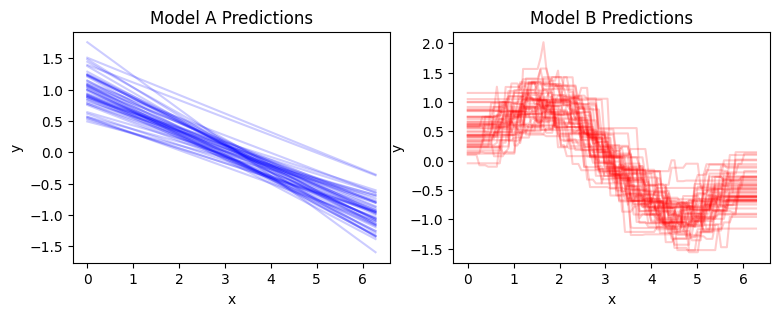

In [14]:
plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
plt.title("Model A")
# YOUR CODE GOES HERE
x = np.linspace(0, np.pi * 2, 100).reshape(-1, 1)
for model in models_A:
    y_pred = model.predict(x)
    plt.plot(x, y_pred, color="blue", alpha=0.2)
plt.title("Model A Predictions")
plt.xlabel("x")
plt.ylabel("y")


plt.subplot(1,2,2)
plt.title("Model B")
# YOUR CODE GOES HERE
for model in models_B:
    y_pred = model.predict(x)
    plt.plot(x, y_pred, color="red", alpha=0.2)
plt.title("Model B Predictions")
plt.xlabel("x")
plt.ylabel("y")

plt.show()